# ML-Driven Waste Classification for Effective Organic and Non-Organic Waste Management

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import pickle
import seaborn as sns

In [2]:
from skimage.transform import resize
from skimage.io import imread
from skimage import io, transform

In [3]:
Categories=['ORGANIC','NONORGANIC']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir=r"Data"

#create file paths by combining the datadir (data directory) with the filenames 'flat_data.npy
flat_data_file = os.path.join(datadir, 'flat_data.npy')
target_file = os.path.join(datadir, 'target.npy')

if os.path.exists(flat_data_file) and os.path.exists(target_file):
    # Load the existing arrays
    flat_data = np.load(flat_data_file)
    target = np.load(target_file)
else:
    #path which contains all the categories of images
    for i in Categories:
        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        #create file paths by combining the datadir (data directory) with the i
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))#Reads the image using imread.
            img_resized=resize(img_array,(150,150,3)) #Resizes the image to a common size of (150, 150, 3) pixels.
            flat_data_arr.append(img_resized.flatten()) #Flattens the resized image array and adds it to the flat_data_arr.
            target_arr.append(Categories.index(i)) #Adds the index of the category to the target_arr.
            #this index is being used to associate the numerical representation of the category (index) with the actual image data. This is often done to provide labels for machine learning algorithms where classes are represented numerically. In this case, 'ORGANIC' might correspond to label 0, and 'NONORGANIC' might correspond to label 1.
            print(f'loaded category:{i} successfully')
            #After processing all images, it converts the lists to NumPy arrays (flat_data and target).
            flat_data=np.array(flat_data_arr)
            target=np.array(target_arr)
    # Save the arrays(flat_data ,target ) into the files(flat_data.npy,target.npy)
    np.save(os.path.join(datadir, 'flat_data.npy'), flat_data)
    np.save(os.path.join(datadir, 'target.npy'), target)

In [4]:
print(flat_data_file)
target_file

Data\flat_data.npy


'Data\\target.npy'

In [5]:
len(flat_data_arr)

0

In [6]:
flat_data

array([[0.0974437 , 0.1918075 , 0.09944671, ..., 0.55801798, 0.4902957 ,
        0.48149725],
       [0.04387345, 0.04387345, 0.03603032, ..., 0.15658938, 0.21809946,
        0.10147297],
       [0.33227669, 0.49722841, 0.21341778, ..., 0.59239596, 0.58945396,
        0.56370355],
       ...,
       [0.89737754, 0.68766147, 0.64735298, ..., 0.98831612, 0.96870827,
        0.95659062],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.98431373, 0.98431373, 0.99215686, ..., 0.95710665, 0.95710665,
        0.95710665]])

In [7]:
target.sum()

634

In [8]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target #associated the numerical representation of the category (index) with the actual image data
df.shape


(1310, 67501)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.097444,0.191808,0.099447,0.106335,0.206450,0.083795,0.238332,0.345064,0.178272,0.304505,...,0.498860,0.446508,0.433893,0.524331,0.465507,0.453742,0.558018,0.490296,0.481497,0
1,0.043873,0.043873,0.036030,0.046814,0.046814,0.038971,0.051960,0.052941,0.042155,0.057106,...,0.068142,0.114706,0.047316,0.119822,0.173248,0.089684,0.156589,0.218099,0.101473,0
2,0.332277,0.497228,0.213418,0.309497,0.465629,0.207542,0.306365,0.455387,0.214695,0.360014,...,0.567904,0.560295,0.533831,0.572553,0.568134,0.536517,0.592396,0.589454,0.563704,0
3,0.573766,0.562001,0.495335,0.559854,0.548090,0.481423,0.647564,0.635800,0.571095,0.701228,...,0.565451,0.618633,0.654911,0.645296,0.700439,0.739906,0.648251,0.695314,0.724492,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1306,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1307,0.897378,0.687661,0.647353,0.903062,0.578085,0.555158,0.951056,0.571381,0.569591,0.953886,...,0.976863,0.957261,0.944420,0.978710,0.959102,0.946729,0.988316,0.968708,0.956591,1
1308,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [10]:
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
          67491,    67492,    67493,    67494,    67495,    67496,    67497,
          67498,    67499, 'Target'],
      dtype='object', length=67501)

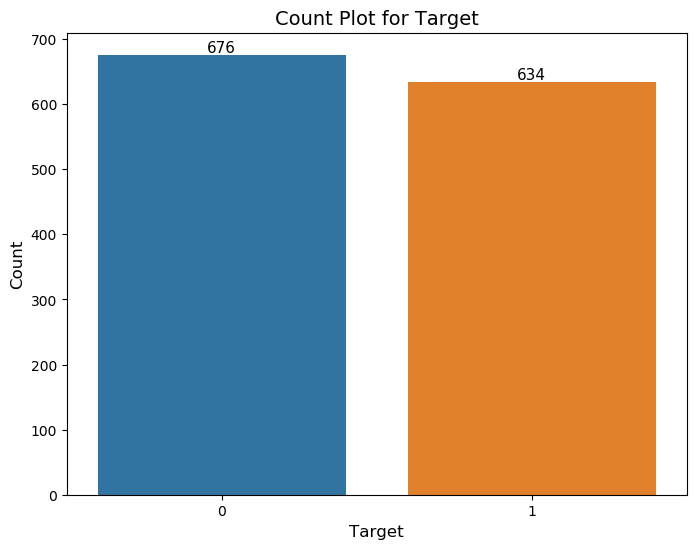

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Target')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count Plot for Target', fontsize=14)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [12]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]
y
x

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.097444,0.191808,0.099447,0.106335,0.206450,0.083795,0.238332,0.345064,0.178272,0.304505,...,0.430577,0.498860,0.446508,0.433893,0.524331,0.465507,0.453742,0.558018,0.490296,0.481497
1,0.043873,0.043873,0.036030,0.046814,0.046814,0.038971,0.051960,0.052941,0.042155,0.057106,...,0.076730,0.068142,0.114706,0.047316,0.119822,0.173248,0.089684,0.156589,0.218099,0.101473
2,0.332277,0.497228,0.213418,0.309497,0.465629,0.207542,0.306365,0.455387,0.214695,0.360014,...,0.552195,0.567904,0.560295,0.533831,0.572553,0.568134,0.536517,0.592396,0.589454,0.563704
3,0.573766,0.562001,0.495335,0.559854,0.548090,0.481423,0.647564,0.635800,0.571095,0.701228,...,0.690175,0.565451,0.618633,0.654911,0.645296,0.700439,0.739906,0.648251,0.695314,0.724492
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1306,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1307,0.897378,0.687661,0.647353,0.903062,0.578085,0.555158,0.951056,0.571381,0.569591,0.953886,...,0.943769,0.976863,0.957261,0.944420,0.978710,0.959102,0.946729,0.988316,0.968708,0.956591
1308,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=77)

In [ ]:
from sklearn.svm import SVC
svm=SVC()
filename = 'SVC_Classifier.pkl'
if os.path.exists('SVC_Classifier.pkl'):
# Load the trained model from the Pickle file
 with open(filename, 'rb') as RF_Model_pkl:
            svm = pickle.load(RF_Model_pkl)
            y_pred=svm.predict(x_test)
            Acc=accuracy_score(y_test,y_pred)*100
            print("Accuracy",Acc)
else:
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    Acc=accuracy_score(y_test,y_pred)*100
    print("Accuracy",Acc)
    # Dump the trained Naive Bayes classifier with Pickle
    filename = 'RF_Classifier.pkl'
    # Open the file to save as pkl file
    RF_Model_pkl = open(filename, 'wb')
    #when you use 'wb' as the mode when opening a file, you are telling Python to open the file in write mode and treat it as a binary file. This is commonly used when saving non-textual data, such as images, audio, or serialized objects like machine learning models
    pickle.dump(svm, RF_Model_pkl)
    #function to serialize and save the rf object (which is your trained Random Forest model) into the Pickle file opened as RF_Model_pkl.
    # Close the pickle instances
    RF_Model_pkl.close()

In [ ]:
cm1=confusion_matrix(y_test,y_pred)
cm1

In [ ]:
class_labels=['ORGANIC','NONORGANIC']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of SVM")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
filename = 'RF_Classifier.pkl'
if os.path.exists('RF_Classifier.pkl'):
# Load the trained model from the Pickle file
 with open(filename, 'rb') as RF_Model_pkl:
            rf = pickle.load(RF_Model_pkl)
            y_pred=rf.predict(x_test)
            Acc=accuracy_score(y_test,y_pred)*100
            print("Accuracy",Acc)
else:
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    Acc=accuracy_score(y_test,y_pred)*100
    print("Accuracy",Acc)
    # Dump the trained Naive Bayes classifier with Pickle
    filename = 'RF_Classifier.pkl'
    # Open the file to save as pkl file
    RF_Model_pkl = open(filename, 'wb')
    #when you use 'wb' as the mode when opening a file, you are telling Python to open the file in write mode and treat it as a binary file. This is commonly used when saving non-textual data, such as images, audio, or serialized objects like machine learning models
    pickle.dump(rf, RF_Model_pkl)
    #function to serialize and save the rf object (which is your trained Random Forest model) into the Pickle file opened as RF_Model_pkl.
    # Close the pickle instances
    RF_Model_pkl.close()

In [ ]:
Acc=accuracy_score(y_test,y_pred)*100
print("Accuracy",Acc)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
class_labels=['ORGANIC','NONORGANIC']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

In [ ]:
path = r"test images"
Categories = {0:'ORGANIC',1:'NONORGANIC'}  # Define your categories with corresponding labels
for filename in os.listdir(path):
    img_path = os.path.join(path, filename)  # Construct the complete image path
    img = imread(img_path)
    
    plt.imshow(img)
    plt.show()
    
    img_resize = resize(img, (150, 150, 3))
    l = [img_resize.flatten()]
    
    # Make predictions using your pre-trained model
    prediction = rf.predict(l)[0]
    predicted_category = Categories[prediction]
    print("The predicted image is:", predicted_category)
